In [2]:
import pandas as pd

# Define the file path
file_path = 'hotel_booking.csv'

# Load the dataset
df = pd.read_csv(file_path)
print("Dataset loaded successfully.")
    # Display the first few rows
display(df.head())



Dataset loaded successfully.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498



Summary Statistics:
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   

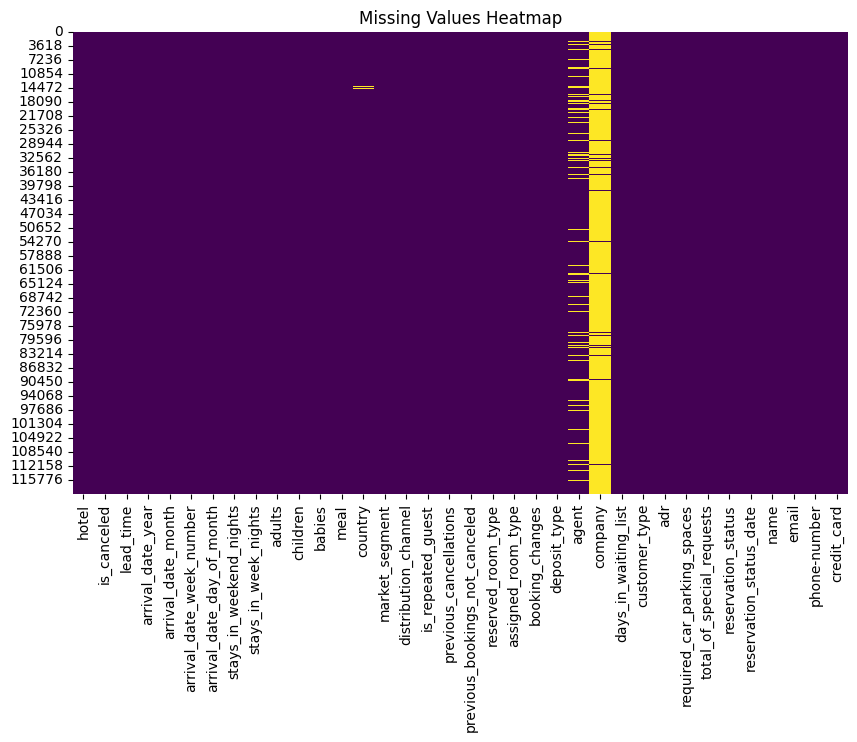

C:\Users\ratho\AppData\Local\Temp\ipykernel_1788\3782545350.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hotel', data=df, palette='coolwarm')


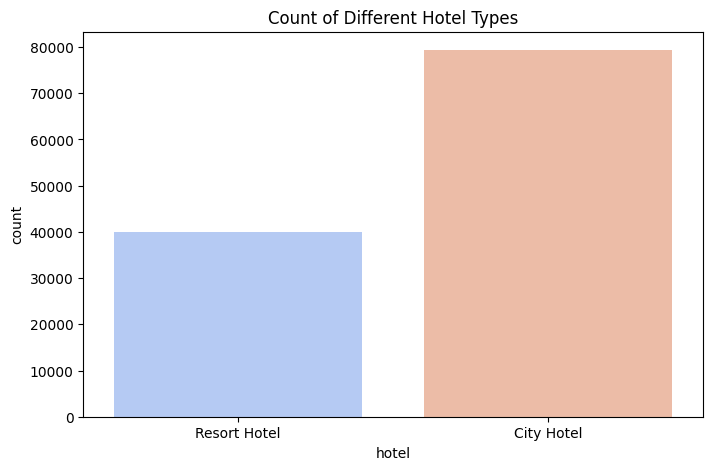

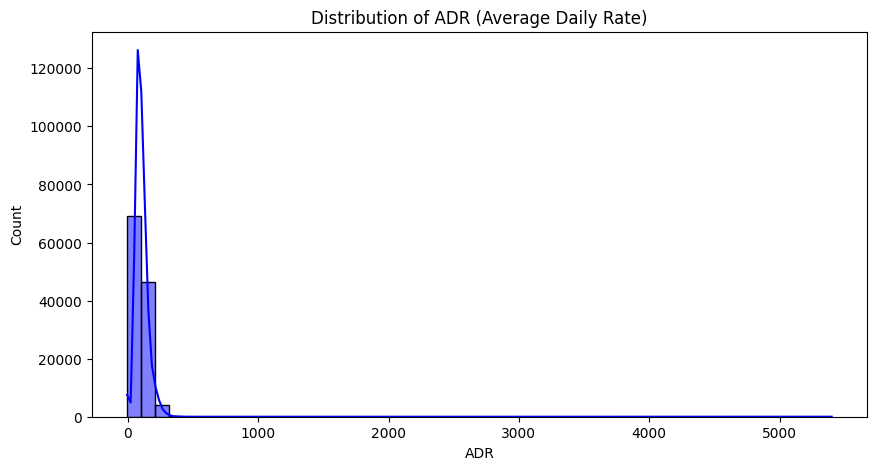

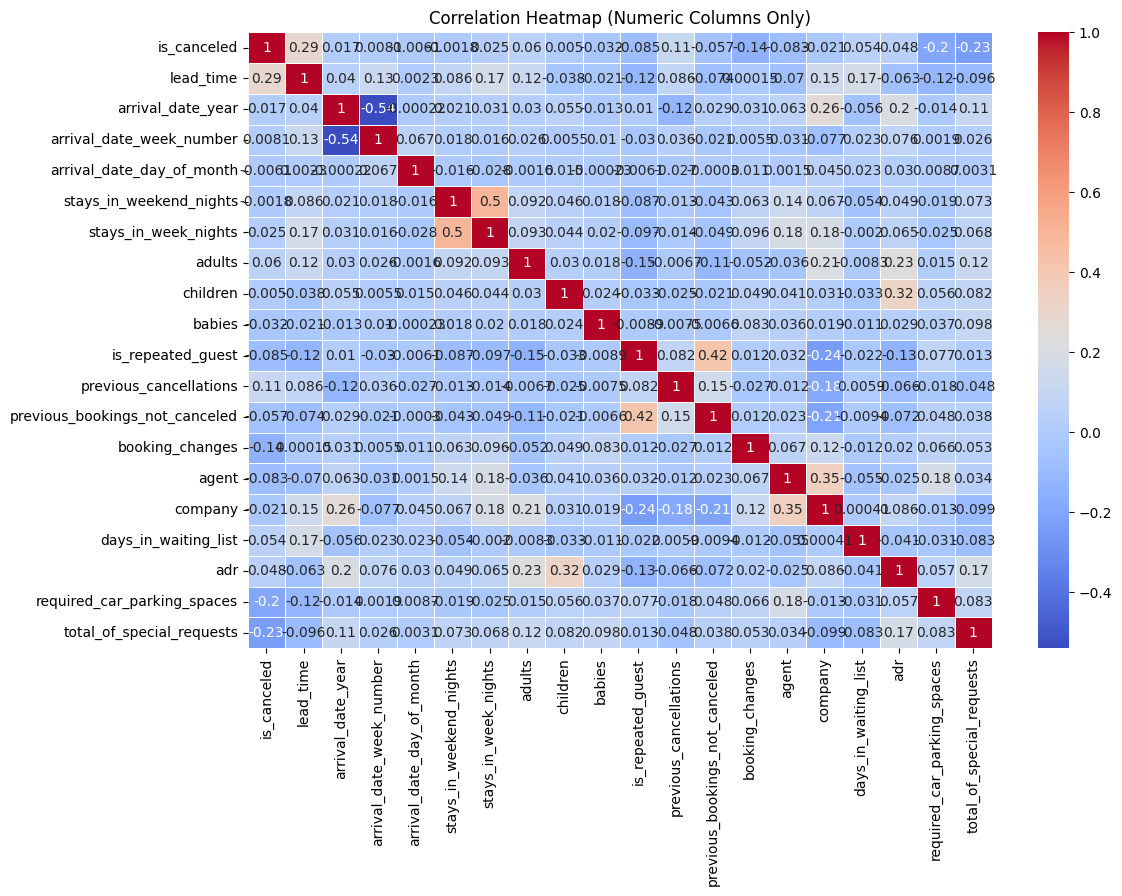

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualizations
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Countplot for hotel types
plt.figure(figsize=(8, 5))
sns.countplot(x='hotel', data=df, palette='coolwarm')
plt.title("Count of Different Hotel Types")
plt.show()

# Distribution of Average Daily Rate (ADR)
plt.figure(figsize=(10, 5))
sns.histplot(df['adr'], bins=50, kde=True, color='blue')
plt.title("Distribution of ADR (Average Daily Rate)")
plt.xlabel("ADR")
plt.ylabel("Count")
plt.show()

# Correlation Heatmap with only numerical columns
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handling Missing Values
missing_threshold = 0.3 * len(df)  # Drop columns with more than 30% missing values
df = df.dropna(thresh=missing_threshold, axis=1)

df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric missing values with median

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical missing values with mode

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Encoding Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature Scaling
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Splitting Data into Training and Testing Sets
X = df.drop(columns=['is_canceled'])  # Assuming 'is_canceled' is the target variable
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData Preprocessing Completed.")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

C:\Users\ratho\AppData\Local\Temp\ipykernel_1788\2503985917.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical missing values with mode



Data Preprocessing Completed.
Training Data Shape: (95512, 34)
Testing Data Shape: (23878, 34)


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


# Step 1: Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel: Linear Regression")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Model: Linear Regression
Mean Absolute Error (MAE): 0.1600267527027926
R-squared (R2): 0.856088109731468


In [6]:
from sklearn.ensemble import RandomForestRegressor

# Step 2: Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nModel: Random Forest")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R2): {r2_rf}")


Model: Random Forest
Mean Absolute Error (MAE): 4.2227858607369085e-13
R-squared (R2): 1.0
